In [106]:
import numpy as np              
import matplotlib.pyplot as plt 
import pandas as pd
import os
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

## Загружаем данные космических наблюдений:
Данные состоят из 10 000 наблюдений за космосом, сделанных SDSS. Каждое наблюдение описывается 17 столбцами характеристик и 1 столбцом класса, который определяет, что это звезда, галактика или квазар.

In [107]:
data = pd.read_csv("./SloanDigitalSkySurvey.csv")

In [108]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [109]:
data.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


In [110]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


### Здесь присутсвуют следующие признаки:
* objid = Идентификатор объекта.
* ra = Прямое восхождени.
* dec = Склонение.
> Прямое восхождение (сокращенно RA) - это угловое расстояние, измеренное на восток вдоль небесного экватора от Солнца в мартовское равноденствие до часового круга точки над землей. В сочетании со склонением (сокращенно dec) эти астрономические координаты определяют направление точки на небесной сфере (традиционно называемой на английском языке небом или небом) в экваториальной системе координат.
* u, g, r, i, z = Представляют отклик 5 диапазонов телескопа.
* run = Номер запуска.
* rereun = Номер повтора.
* camcol = Столбец камеры.
* field = Номер поля.
> Это функции, которые описывают поле в изображении, полученном SDSS. Поле - это в основном часть всего изображения, соответствующая 2048 на 1489 пикселей.
* specobjid = Идентификатор объекта.
* class = Класс объекта, переменная ответа которую мы пытаемся предсказать (Галактика, Звезда или квазар).
* redshift = Окончательно красное смещение.
* пластина = Номерной знак.
* mjd = MJD наблюдения.
* fiberid = Идентификатор волокна.

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


### Распределение данных по классам:

['STAR' 'GALAXY' 'QSO']


<AxesSubplot:xlabel='class', ylabel='count'>

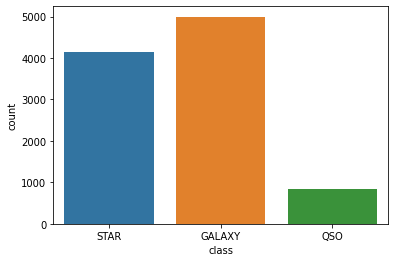

In [112]:
print(data['class'].unique())
sns.countplot(x='class', data=data)

<AxesSubplot:xlabel='camcol', ylabel='count'>

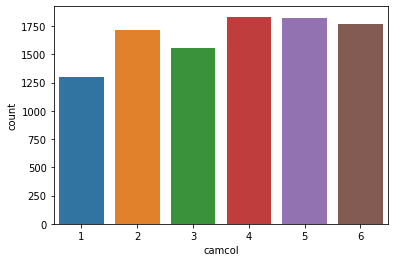

In [113]:
sns.countplot(x='camcol', data=data)

### Проверка на пропущенные значения:

In [114]:
data.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

### График зависимости класса от признака "redshift", а так же boxplot и pairplot:

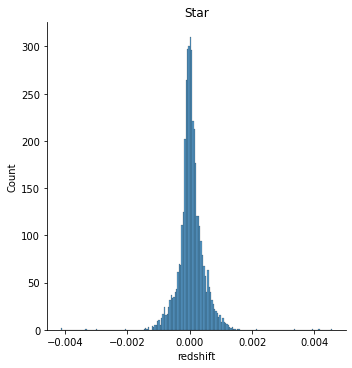

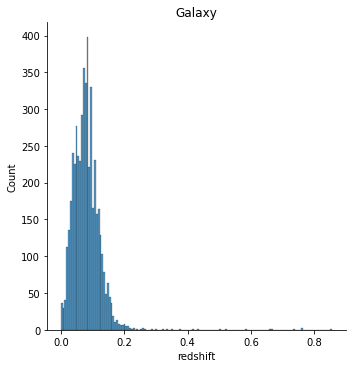

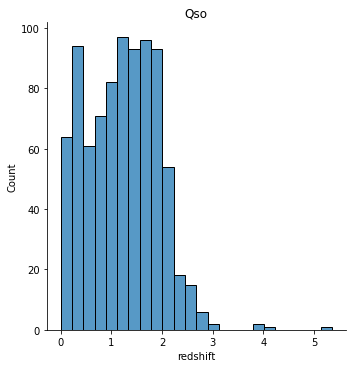

In [115]:
star = data[data['class']=='STAR']['redshift']
galaxy = data[data['class']=='GALAXY']['redshift']
quasar = data[data['class']=='QSO']['redshift']

sns.displot(star)
plt.title("Star")
sns.displot(galaxy)
plt.title("Galaxy")
sns.displot(quasar)
plt.title("Qso")
plt.show()

<AxesSubplot:xlabel='class', ylabel='redshift'>

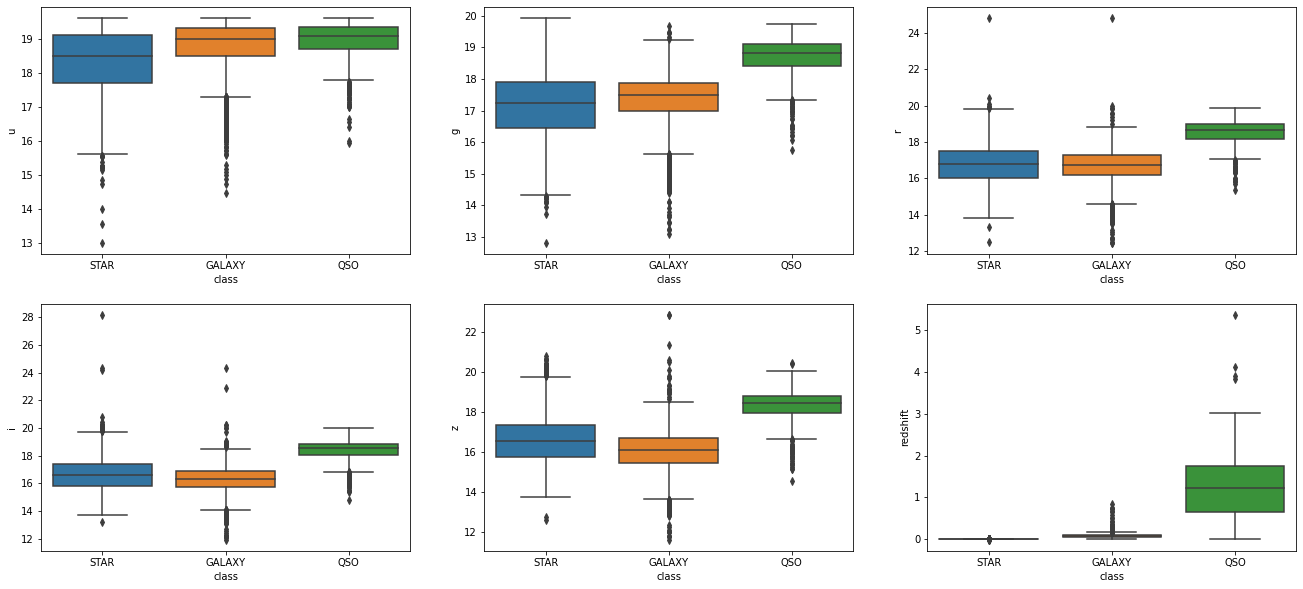

In [116]:
f, axs = plt.subplots(2,3, figsize=(22.5,10))
sns.boxplot(data=data, y='u', x='class', ax=axs[0, 0])
sns.boxplot(data=data, y='g', x='class', ax=axs[0, 1])
sns.boxplot(data=data, y='r', x='class', ax=axs[0, 2])
sns.boxplot(data=data, y='i', x='class', ax=axs[1, 0])
sns.boxplot(data=data, y='z', x='class', ax=axs[1, 1])
sns.boxplot(data=data, y='redshift', x='class', ax=axs[1, 2])

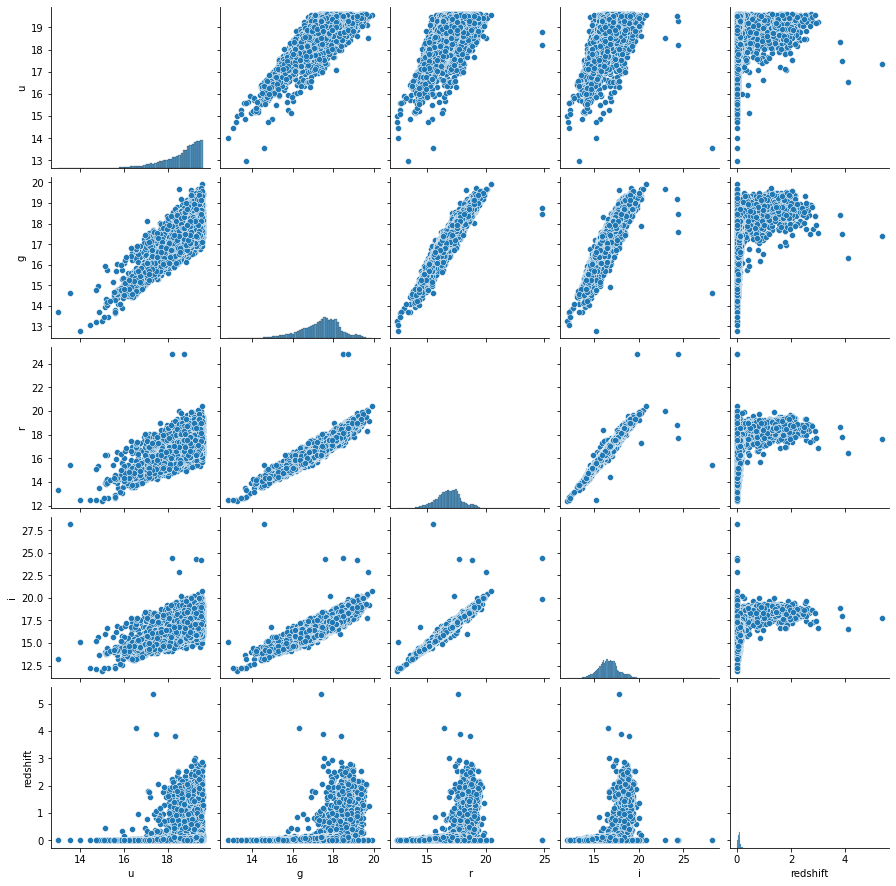

In [117]:
sns.pairplot(data[['u','g','r','i', 'redshift']])

## Подготовка данных:

In [118]:
data.drop(columns=['objid','specobjid', 'rerun'], inplace=True)
data.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,STAR,0.000590,3306,54922,512


In [119]:
data.corr()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.059056,0.093601,0.070354,0.138566
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.006834,0.040795,0.026284,0.535629
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,0.015414,-0.093723,-0.086558,-0.040493


In [120]:
def change_category (type):
    if type == 'STAR':
        return 0
    elif type == 'GALAXY':
        return 1 
    else :
        return 2
data['classtype'] = data['class'].apply(change_category)
data.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid,classtype
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,STAR,-0.000009,3306,54922,491,0
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,STAR,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,GALAXY,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,STAR,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,STAR,0.000590,3306,54922,512,0


In [121]:
data.drop(columns='class',inplace=True)
X = data.drop(columns='classtype')
y = data['classtype']

## Машинное обучение (StandtartScaler + KNeighborsClassifier):

In [122]:
X = StandardScaler().fit_transform(X)

X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
N_train, _ = X_train.shape 
N_test, _ = X_test.shape 

print(N_train, N_test)

7000 3000


In [123]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [124]:
y_test_predict = knn.predict(X_test)
knn_acc = knn.score(X_test,y_test)
err_test = np.mean(y_test  != y_test_predict)
print("Accuracy of KNeighborsClassifier = ", knn_acc)
print("Error of KNeighborsClassifier = ", err_test)

Accuracy of KNeighborsClassifier =  0.897
Error of KNeighborsClassifier =  0.103


In [125]:
print(confusion_matrix(y_test, y_test_predict))

[[1051  164    2]
 [ 102 1394    1]
 [  14   26  246]]
